### 1. Problem
Assume we have a set of $n$ continuous variables $\mathcal{X} =\{X_0, \dots, X_p\}$ and a binary target variable $Y$. We want to find a subset of discretizated variables $S = \{X_i', \dots, X_j'|i<j<p\}$ which can maximum the mutual information.
$$
\argmax I(\mathcal{S};Y) = E(\hat I(S;Y))
$$

Here, to make different size of subset varaibles $S$ comparable, we use fraction of mutual information. 
$$
F(\mathcal{X};Y) = \frac{I(\mathcal{X};Y)}{H(Y)}
$$,
where H(Y) is the entropy of $Y$.

### 2. Recall of reliable Mutual information
Here, We aim to estimate the unbias mutual information estimator (reliable mutual information). 
<br>

#### 2.1 Recap Bias:
Naive estimator is a discrete estimator. When it comes to continuous variables, we need to discretize $\mathcal{X}$ as $\mathcal{X'}$.
$$
Bias = E(\hat I_n(\mathcal{X'}, Y)) -  I(\mathcal{X}, Y)
$$,
where $E(\hat I_n(\mathcal{X'}, Y))$ is the expectation of mutual information based on $n$ example,  $I(\mathcal{X}, Y)$ is the real mutual information.
$$
\hat I(\mathcal{X}, Y) = E_0(\hat I(\mathcal{X'}, Y)) + \hat I_0(\mathcal{X'}, Y).
$$ 
where $\hat I_0(\mathcal{X'}, Y)$ is the real mutual information term and we named it __reliable mutual information__. 
<br><br>

### 3. Discretization methods
Here, we consider to develope mutual information based discretization methods. Our approach is to develope a method, in which this aviods over-discretization issues nor under-discretization issues.

#### 3.1 Stagewise  
For given $p$ dimensions, we greedly find a dimension $X_i$ and finely discretized it until fraction of Mutual information doesn't improve. Then, we keep dimension $X_i'$ fixed and repeat this process, until reaching the maximum fraction of mutual information.

Steps:
1. Initialize dimension set $S = \{\}$  
While loop:    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Find a dimension $i$, which reaches maximum fraction of mutual information  
    $$
    \hat F(\mathcal{X'}; Y) = \argmax_{1< i < p} \hat F(\{S, X_i'\}; Y) 
    $$
    3. Add fixed discretized dimension into set `S.add(X_i')`  
    4. If the fraction of mutual information doesn't improve, return the variable set S 

<br>

#### 3.2 Joint Discretization     
We greedly find a cut point $X_{i_k}$ to discretize $i$th dimension, in which this can improve the fraction of mutual information. Rather than keeping the fixed dimension, here we keep the fixed cut point. Then, we repeat this process until reaching the maximum of fraction of mutual information.

Steps:
1. Initialize variable set $V = \{\}$   
While loop:  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Find a cut point $X_{i_k}$, which reaches maximum fraction of mutual information after discretizing existing .
    For example, after choosing a point $X_{i_k}$, we define the discreitzed dimension as $X_{l_{i_k}}'$
    $$
    \hat F(\mathcal{X'}; Y) = \argmax_{1< l < p, 1< i < p, 1 < k < n} \hat F(\{S, X_{l_{i_k}}'\}; Y) 
    $$
    3. Add add selected cut point into set $\text{V.add}(X_{i_k})$
    4. If fraction of mutual information doesn't improve, return the variable set $V$

### 4.Experiment Design
1. Non-linear boundary
2. Linear boundary
3. Independent variables/dependent variables
4. Interaction effect

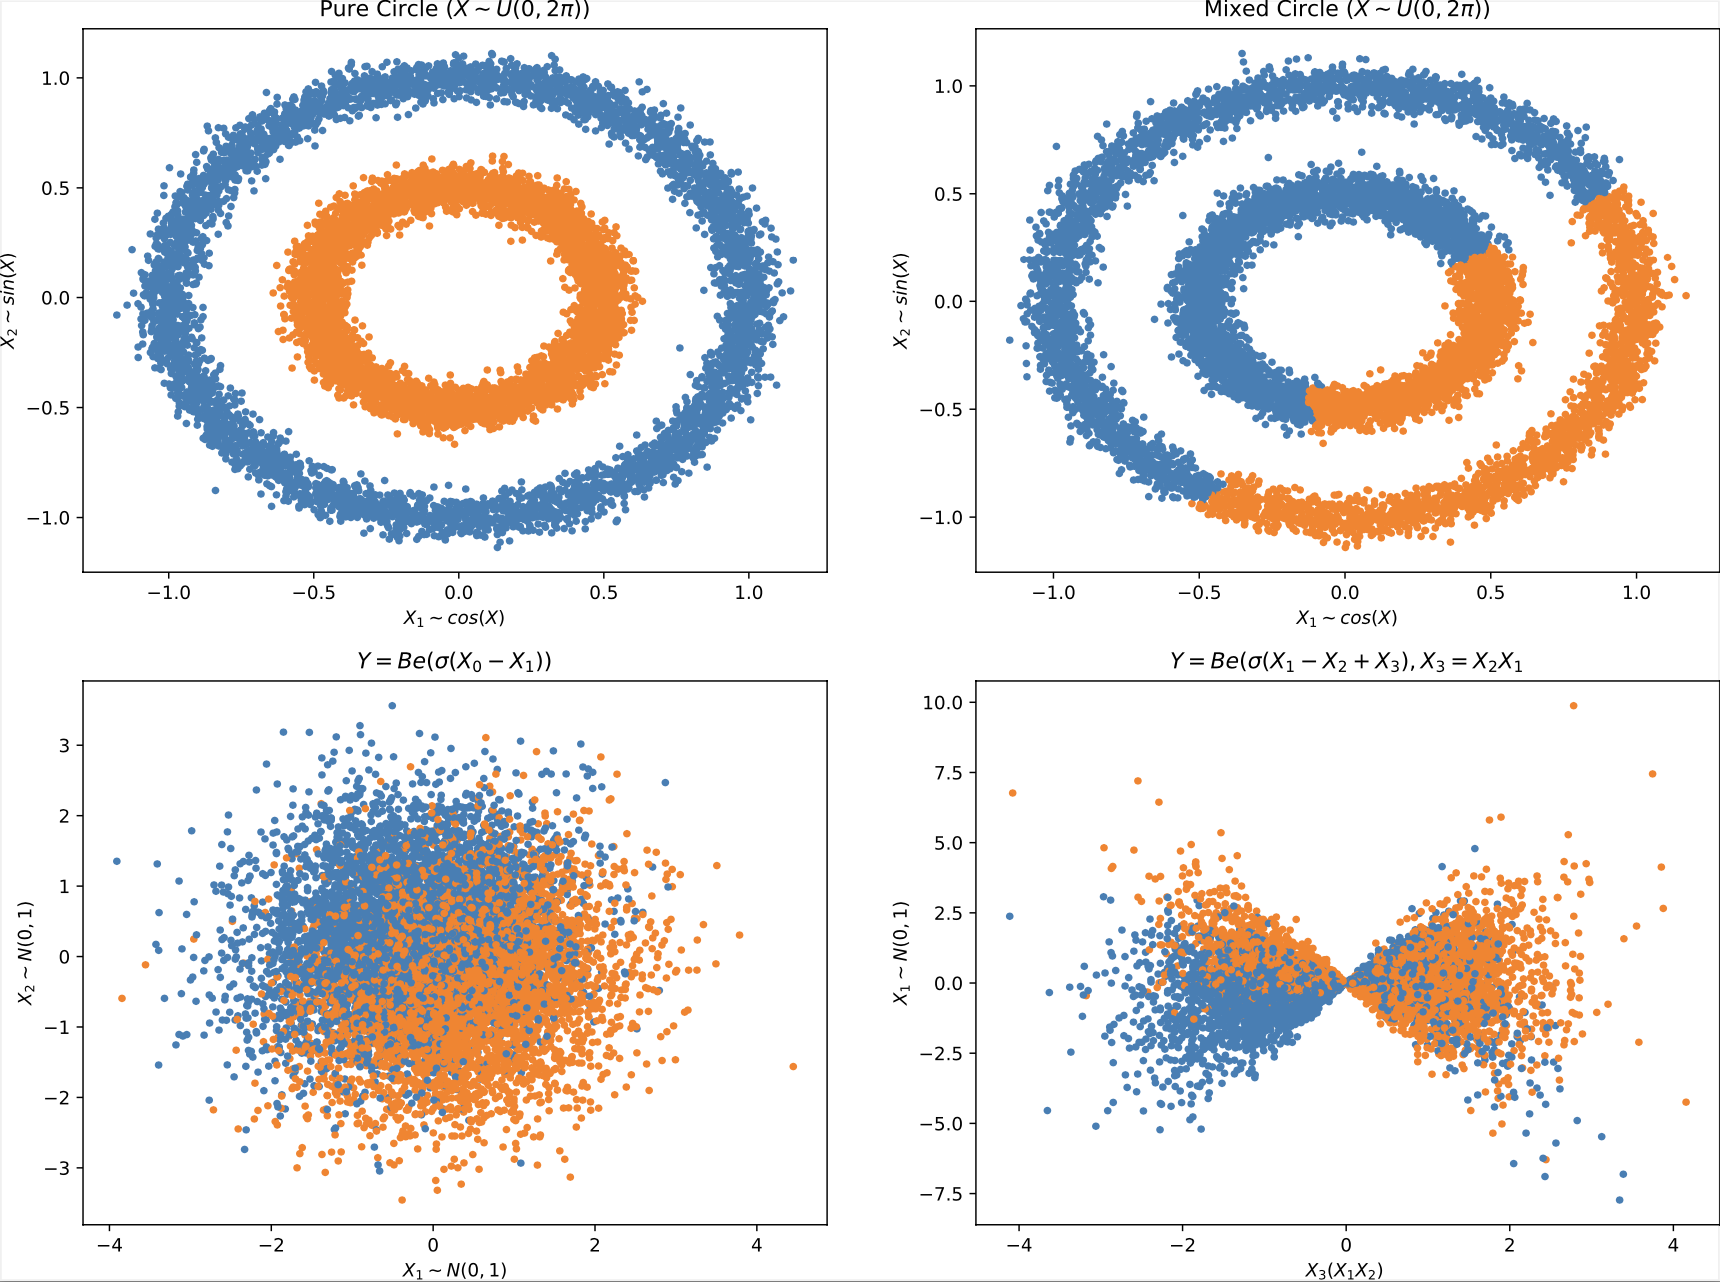

### 5. Variable Selection
We use total 50 variables and keep 48 irrelevant variables in Experiment1,2,3. In experiment4, we have 47 irrelevant variables.
Due to the `StageWise` and `JointDiscretization` methods, we can simply use the selected dimensions to identify the relevant variables.
To evaluate our result, we use statistical methods such as `recall`, `precision` and `f1`.  

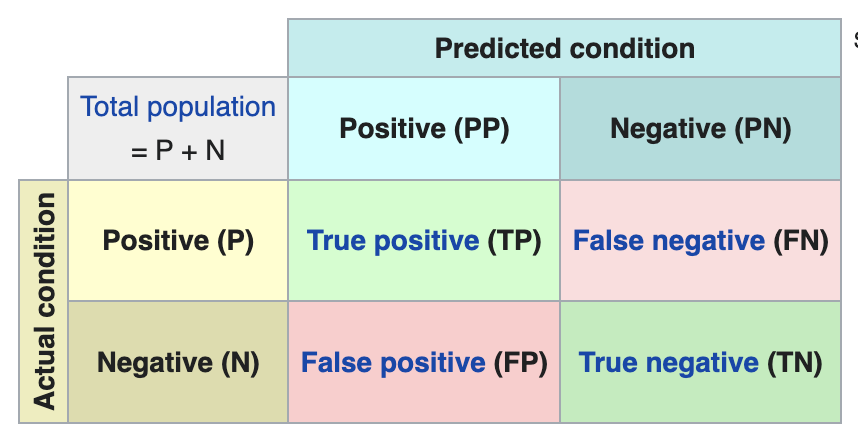
ref:https://en.wikipedia.org/wiki/Confusion_matrix
$$\text{Recall} = \frac{TP}{TP + FN}$$
$$\text{Precision} = \frac{TP}{TP + FP}$$
$$\text{F1} = \frac{\text{Recall}*\text{Precision}}{\text{Recall} + \text{Precision}}$$





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_generator import dataGenerator2d
from variableSelection import evaluationExperiment
from efficiency_joint_discretization import jointDiscretization, stageWiseDiscretization
from plotting import plot2Discretization

np.random.seed(100)

def compareStageJoint(stage_dim_list, joint_dim_list, stage_best_value_list, joint_best_value_list, stage_best_fmi, joint_best_fmi): 
    """Compare the result with stagewise and joint discretization
    """
    return pd.DataFrame({'Dimension list': [",".join([str(each) for each in stage_dim_list]),
                                    ",".join([str(each) for each in joint_dim_list])], 
                'Selected best cutpoints': [",".join([str(each) for each in stage_best_value_list]),
                                            ",".join([str(each) for each in joint_best_value_list])],
                'Maxmimum FMI': [stage_best_fmi, joint_best_fmi]}, index=['StageWise', 'Joint'])

### Experiment 1
Non-linear boundary

In [5]:
dataExp1, yExp1 = dataGenerator2d(rr=2, irr=0, n=100, types='independent_circle', noise=0.05).fit()
dataExp1['Y'] = yExp1

In [3]:
stage_best_subsetData_list, stage_best_fmi, stage_dim_list, stage_best_value_list = stageWiseDiscretization(dataExp1, permut=True)
joint_best_subsetData_list, joint_best_fmi, joint_dim_list, joint_best_value_list = jointDiscretization(dataExp1, permut=True)

df1 = compareStageJoint(stage_dim_list, joint_dim_list, stage_best_value_list, joint_best_value_list, stage_best_fmi, joint_best_fmi)
df1

,Dimension list,Selected best cutpoints,Maxmimum FMI
StageWise,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1","-0.6106208275815493,0.5237214244861922,0.46203...",0.754799
Joint,"0,0,1,1","-0.6106208275815493,0.5237214244861922,-0.8509...",0.959606


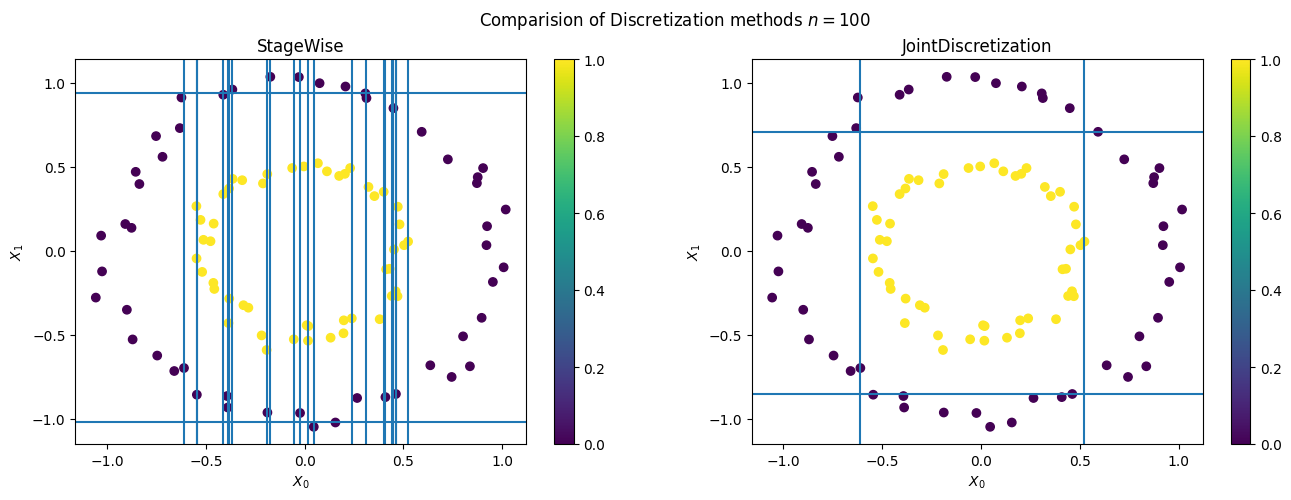

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Comparision of Discretization methods $n=100$')
plot2Discretization(dataExp1, stage_best_subsetData_list, stage_dim_list, stage_best_value_list, 'StageWise', ax1)
plot2Discretization(dataExp1, joint_best_subsetData_list, joint_dim_list, joint_best_value_list, 'JointDiscretization', ax2)

### Experiment 2
Linear boundary

In [5]:
dataExp2, yExp2 = dataGenerator2d(rr=2, irr=0, n=100, types='mixed_circle', noise=0.05).fit()
dataExp2['Y'] = yExp2

stage_best_subsetData_list, stage_best_fmi, stage_dim_list, stage_best_value_list = stageWiseDiscretization(dataExp2, permut=True)
joint_best_subsetData_list, joint_best_fmi, joint_dim_list, joint_best_value_list = jointDiscretization(dataExp2, permut=True)

df2 = compareStageJoint(stage_dim_list, joint_dim_list, stage_best_value_list, joint_best_value_list, stage_best_fmi, joint_best_fmi)
df2

,Dimension list,Selected best cutpoints,Maxmimum FMI
StageWise,"1,1,1,1,1,1,1","-0.056296610718752714,-0.2549479753909428,-0.2...",0.931885
Joint,"1,1,0,0","-0.056296610718752714,-0.2549479753909428,-0.0...",0.949055


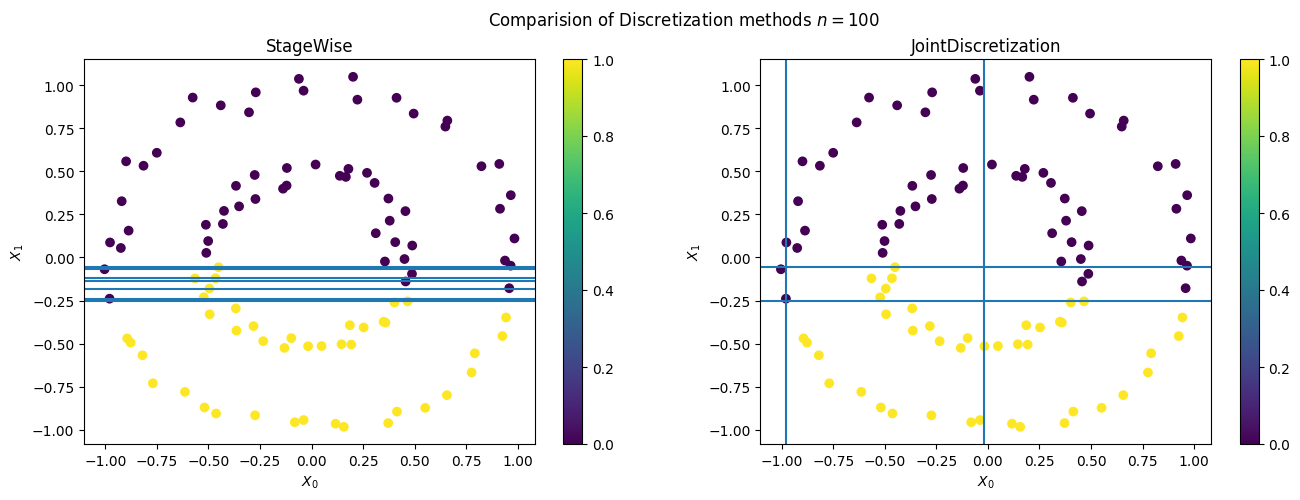

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Comparision of Discretization methods $n=100$')
plot2Discretization(dataExp1, stage_best_subsetData_list, stage_dim_list, stage_best_value_list, 'StageWise', ax1)
plot2Discretization(dataExp1, joint_best_subsetData_list, joint_dim_list, joint_best_value_list, 'JointDiscretization', ax2)

### Experiment 3

Independent variable with logistic regression

In [7]:
dataExp3, yExp3 = dataGenerator2d(rr=2, irr=0, n=100, types='no_structure', noise=0.05).fit()
dataExp3['Y'] = yExp3

stage_best_subsetData_list, stage_best_fmi, stage_dim_list, stage_best_value_list = stageWiseDiscretization(dataExp3, permut=True)
joint_best_subsetData_list, joint_best_fmi, joint_dim_list, joint_best_value_list = jointDiscretization(dataExp3, permut=True)

df3 = compareStageJoint(stage_dim_list, joint_dim_list, stage_best_value_list, joint_best_value_list, stage_best_fmi, joint_best_fmi)
df3

,Dimension list,Selected best cutpoints,Maxmimum FMI
StageWise,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","1.1681938029214032,-0.982905643039548,-0.45291...",0.590961
Joint,"0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0","1.1681938029214032,1.0667077551284008,0.963852...",0.478152


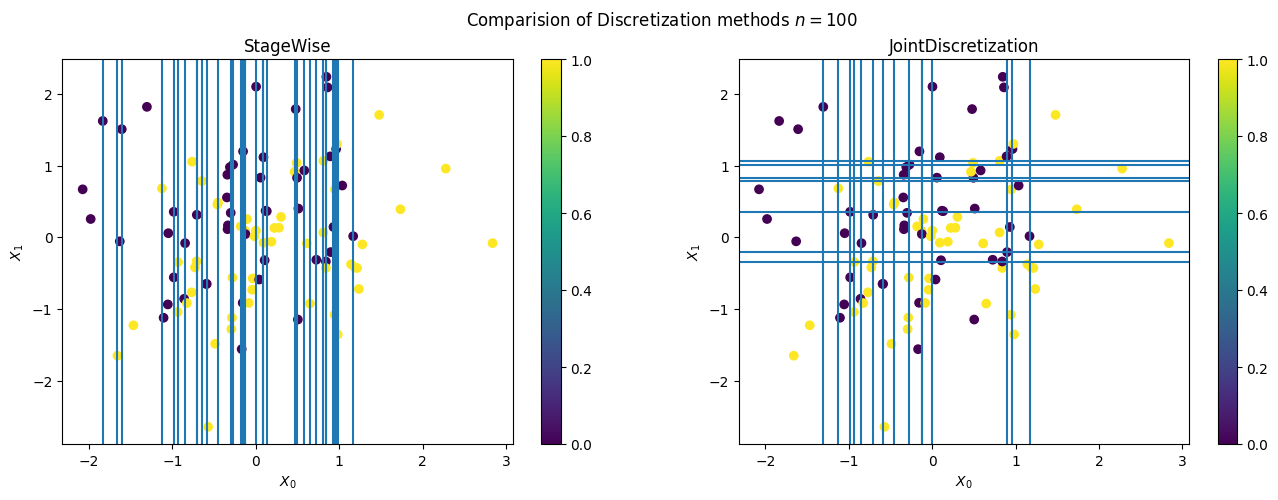

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Comparision of Discretization methods $n=100$')
plot2Discretization(dataExp1, stage_best_subsetData_list, stage_dim_list, stage_best_value_list, 'StageWise', ax1)
plot2Discretization(dataExp1, joint_best_subsetData_list, joint_dim_list, joint_best_value_list, 'JointDiscretization', ax2)

### Experiment 4

Interaction terms with logistic regression

In [2]:
dataExp4, yExp4 = dataGenerator2d(rr=3, irr=0, n=100, types='interaction', noise=0.05).fit()
dataExp4['Y'] = yExp4

stage_best_subsetData_list, stage_best_fmi, stage_dim_list, stage_best_value_list = stageWiseDiscretization(dataExp4, permut=True)
joint_best_subsetData_list, joint_best_fmi, joint_dim_list, joint_best_value_list = jointDiscretization(dataExp4, permut=True)

df4 = compareStageJoint(stage_dim_list, joint_dim_list, stage_best_value_list, joint_best_value_list, stage_best_fmi, joint_best_fmi)
df4

,Dimension list,Selected best cutpoints,Maxmimum FMI
StageWise,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...","0.6989244178890316,-0.9134819857953901,0.60633...",0.529457
Joint,"2,0,1,1,1,1,1,2,0,0,1,2,0,0,2,0","0.6989244178890316,-0.4580269855026243,0.22239...",0.504772


In [4]:
def plot3Discretization(data, best_subsetData_list, dim_list, best_value_list,title_name=None, ax=None, fig=None):
    ax = plt.gca() if ax is None else ax
    xx1, xx2, xx3 = [], [], []
    _class = []
    for each_dic in best_subsetData_list:
        xx1 += list(each_dic['values'][:, 0])
        xx2 += list(each_dic['values'][:, 1])
        xx3 += list(each_dic['values'][:, 2])
        _class  += list(each_dic['values'][:, -1])
    # scatterplot
    return xx1, xx2, xx3, _class
    plotShown = ax.scatter_3d(x=xx1, y=xx2, z=xx3, c=_class)#, cmap="summer")

    best_value_dic = {0:[], 1:[]}
    for i in range(len(dim_list)):
        best_value_dic[dim_list[i]].append(best_value_list[i])
    # best_value_dic
    # for key in best_value_dic:
    #     if key == 0:
    #         for each in best_value_dic[key]:
    #             ax.axvline(x=each)
    #     elif key == 1:
    #         for each in best_value_dic[key]:
    #             ax.axhline(y=each)
    plt.colorbar(plotShown, ax=ax)
    ax.set_title(title_name)
    ax.set_xlabel('$X_0$')
    ax.set_ylabel('$X_1$')

In [9]:
import plotly.express as px


In [28]:
# fig = px.scatter_3d(df, x="X1", y="X2", z="X3", color='X4')
a,b,c,d = plot3Discretization(dataExp4, stage_best_subsetData_list, stage_dim_list, stage_best_value_list, 'StageWise')

import numpy as np 

x = np.array([0,1])
y = np.array([1,1])
z = np.array([1,1])
df1 = pd.DataFrame({"x": x, "y":y, "z":z})
df = pd.DataFrame({'X1':a, 'X2':b, 'X3':c, 'X4':d})

px.scatter_3d(df, x="X1", y="X2", z="X3", color='X4') 
px.line_3d(df1, x="x", y="y", z="z")
# fig.add_vline(x=1)

KeyError: 2

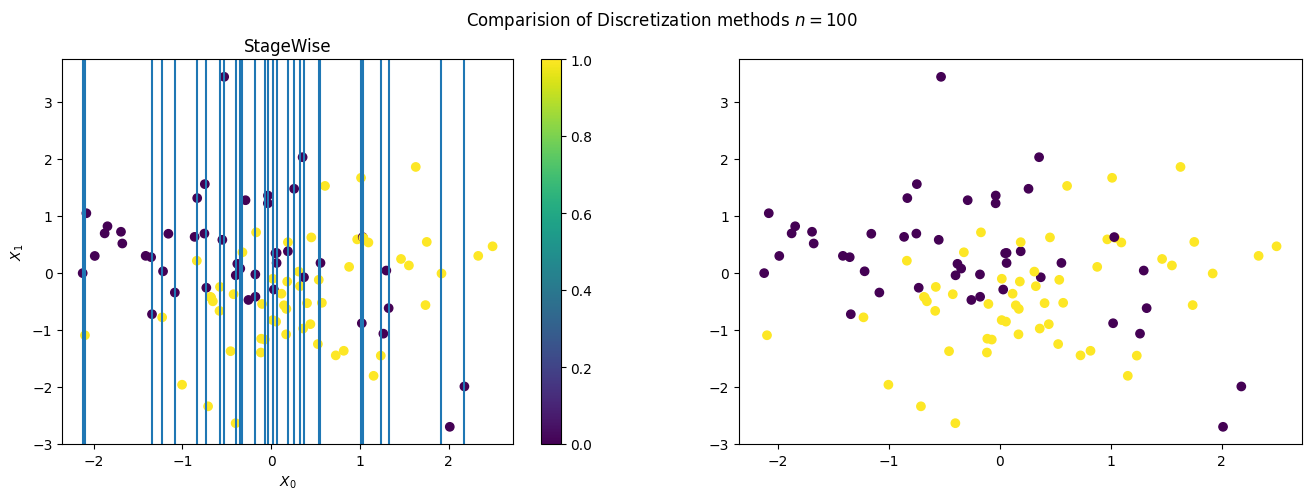

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Comparision of Discretization methods $n=100$')
plot2Discretization(dataExp1, stage_best_subsetData_list, stage_dim_list, stage_best_value_list, 'StageWise', ax1)
plot2Discretization(dataExp1, joint_best_subsetData_list, joint_dim_list, joint_best_value_list, 'JointDiscretization', ax2)

### Repetitions

In [13]:
model_dic = {
            'stage': stageWiseDiscretization,
            'joint': jointDiscretization
            }

In [18]:
exp1 = evaluationExperiment(size=[20, 50, 100], model_dic=model_dic, dataGenerator=dataGenerator2d, rr=2, irr=48, verbose=True, data_rep=8, types='independent_circle')
result1 = exp1.run()

Sample size: 20
Time(s): 18.221607995999875
Sample size: 50
Time(s): 212.01427381699978
Sample size: 100
Time(s): 2006.906490968


In [31]:
exp2 = evaluationExperiment(size=[20, 50, 100], model_dic=model_dic, dataGenerator=dataGenerator2d, rr=2, irr=48, verbose=True, data_rep=10, types='mixed_circle')
result2 = exp2.run()

Sample size: 20
Time(s): 8.696647110000413
Sample size: 50
Time(s): 118.73257048899995
Sample size: 100
Time(s): 1203.0512548630004


In [32]:
exp3 = evaluationExperiment(size=[20, 50, 100], model_dic=model_dic, dataGenerator=dataGenerator2d, rr=2, irr=48, verbose=True, data_rep=10, types='no structure')
result3 = exp3.run()

Sample size: 20
Time(s): 11.56385941499866
Sample size: 50
Time(s): 150.88554372999897
Sample size: 100
Time(s): 1545.6502816479988


In [33]:
exp4 = evaluationExperiment(size=[20, 50, 100], model_dic=model_dic, dataGenerator=dataGenerator2d, rr=3, irr=48, verbose=True, data_rep=10, types='interaction')
result4 = exp4.run()

Sample size: 20
Time(s): 12.669564595000338
Sample size: 50
Time(s): 162.27891385300063
Sample size: 100
Time(s): 1579.7829133390005


In [17]:
from os import listdir
from os.path import isfile, join

exp1path = 'stageJoint_comparison/Experiment1/'
exp1files = [f for f in listdir(exp1path) if isfile(join(exp1path, f)) and f != '.DS_Store']

exp2path = 'stageJoint_comparison/Experiment2/'
exp2files = [f for f in listdir(exp2path) if isfile(join(exp2path, f)) and f != '.DS_Store']

exp3path = 'stageJoint_comparison/Experiment3/'
exp3files = [f for f in listdir(exp3path) if isfile(join(exp3path, f)) and f != '.DS_Store']

exp4path = 'stageJoint_comparison/Experiment4/'
exp4files = [f for f in listdir(exp4path) if isfile(join(exp4path, f)) and f != '.DS_Store']

In [18]:
from plotting import plotDf

Text(0, 0.5, 'Exp3')

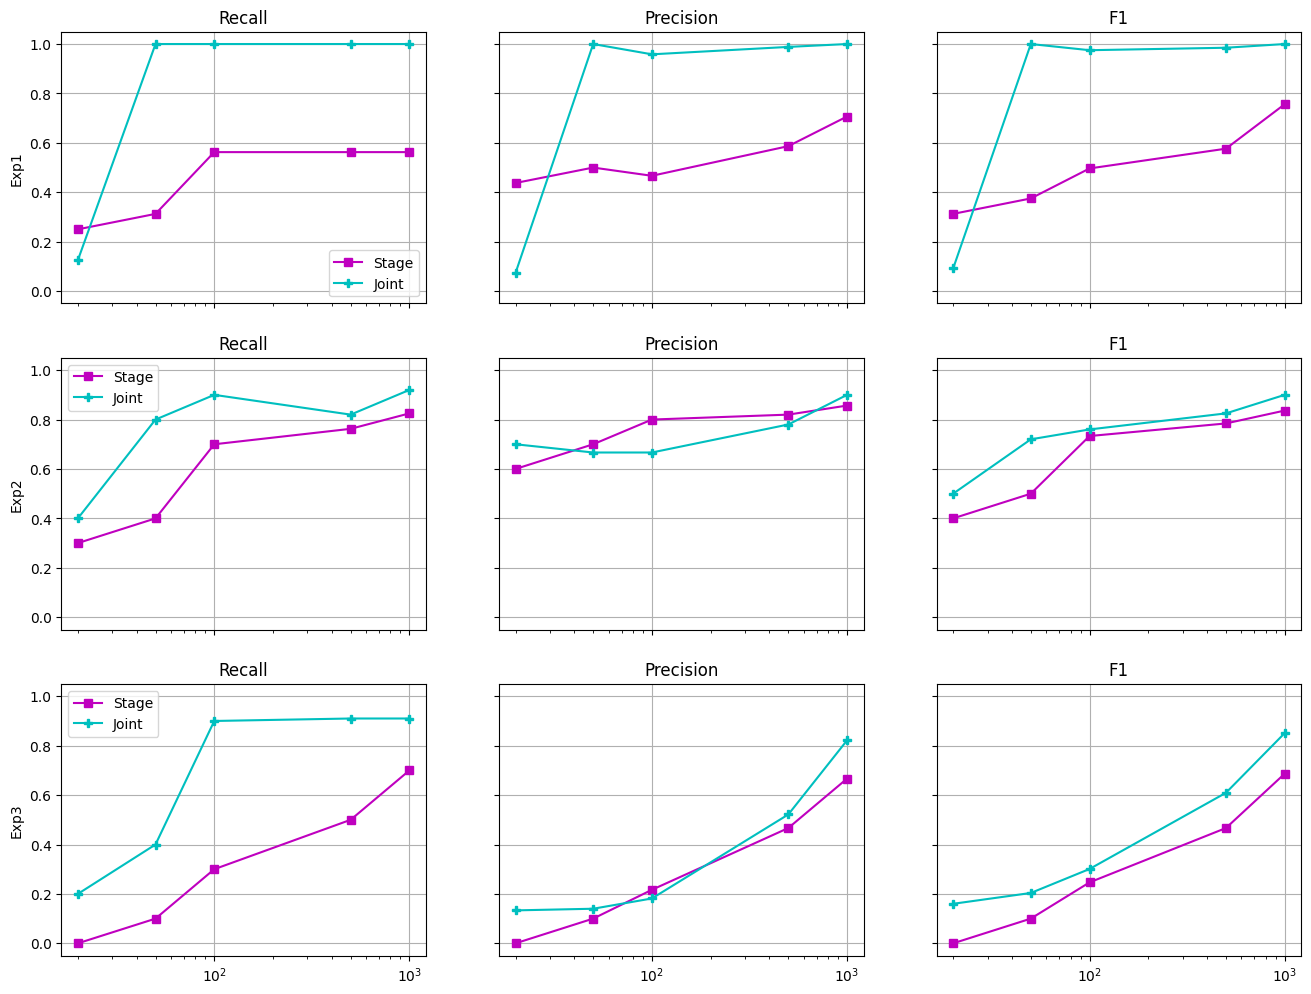

In [20]:
fig, axs = plt.subplots(3,3, sharey=True, sharex=True, figsize=(16,12))

plotDf(exp1files, exp1path, axs[0, 0], axs[0, 1], axs[0, 2], 'Experiment1', xalbel_name=False, legend=True, title=True)
plotDf(exp2files, exp2path, axs[1, 0], axs[1, 1], axs[1, 2], 'Experiment2', xalbel_name=False)
plotDf(exp3files, exp3path, axs[2, 0], axs[2, 1], axs[2, 2], 'Experiment3', xalbel_name=False)
# plotDf(exp4files, exp4path, axs[3, 0], axs[3, 1], axs[3, 2], 'Experiment4', xalbel_name=False)
axs[0, 0].set_ylabel('Exp1')
axs[1, 0].set_ylabel('Exp2')
axs[2, 0].set_ylabel('Exp3')
# axs[3, 0].set_ylabel('Exp4')

### Conclusion

Stagewise discretization:
1. Need to optimize all dimensions
2. Over-discretization problem in first few dimensions but under-discretization problem in all dimensions

Joint discretization:
1. Only optimize one point over all dimensions
2. Aviod over-discretization problems